In [ ]:
#Standard importing library: pandas, numpy, matplotlib dan seaborn (plotting)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #Library umum untuk machine learning
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Loading data (biasanya dari google drive. Kali ini datanya di load dari lokal)
df_train = pd.read_csv('data.csv')

In [ ]:
#intip data, ada berapa kolom
df_train.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
#kita intip data paling atas
df_train.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
#Saya ingin tahu persebaran harga rumah di daerah itu secara umum
df_train['MSRP'].describe()
#ada 1460 rmah yang dijual
# harga rata-rata rumah tersebut adalah 180921
#harga paling murah 34900
#harga palig mahal 755000

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

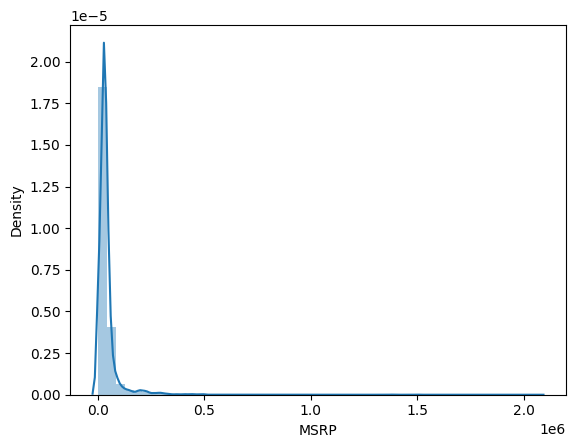

In [ ]:
sns.distplot(df_train['MSRP']);

In [ ]:
#Ada cara untuk mengecek distribusi: Skewness & Kurtosis
print("Skewness: %f" % df_train['MSRP'].skew())
print("Kurtosis: %f" % df_train['MSRP'].kurt())

Skewness: 11.771987
Kurtosis: 268.926276


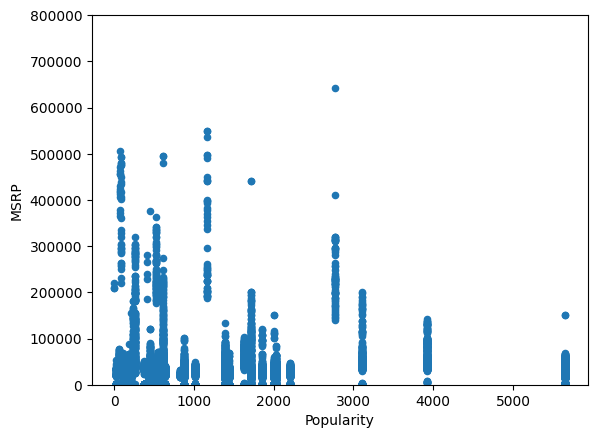

In [ ]:
var = 'Popularity'
data = pd.concat([df_train['MSRP'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='MSRP', ylim=(0,800000));


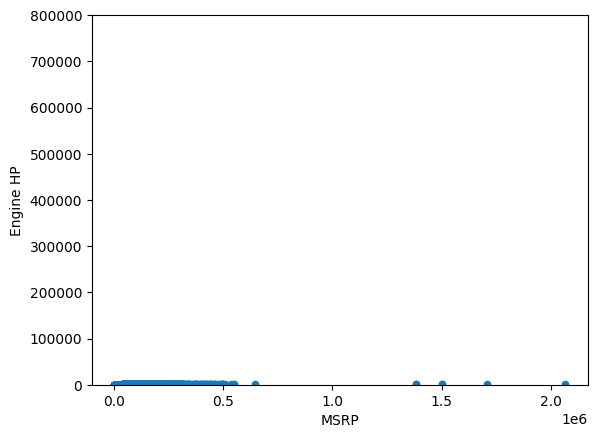

In [ ]:
var = 'MSRP'
data = pd.concat([df_train['Engine HP'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Engine HP', ylim=(0,800000));


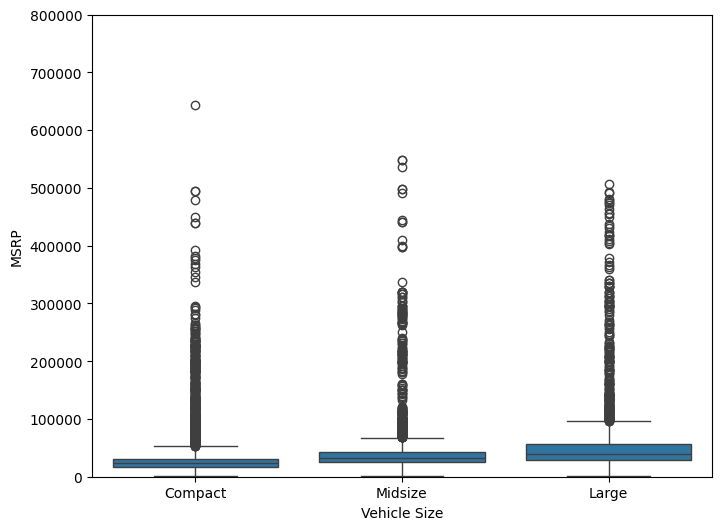

In [ ]:
var = 'Vehicle Size'
data = pd.concat([df_train['MSRP'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MSRP", data=data)
fig.axis(ymin=0, ymax=800000);


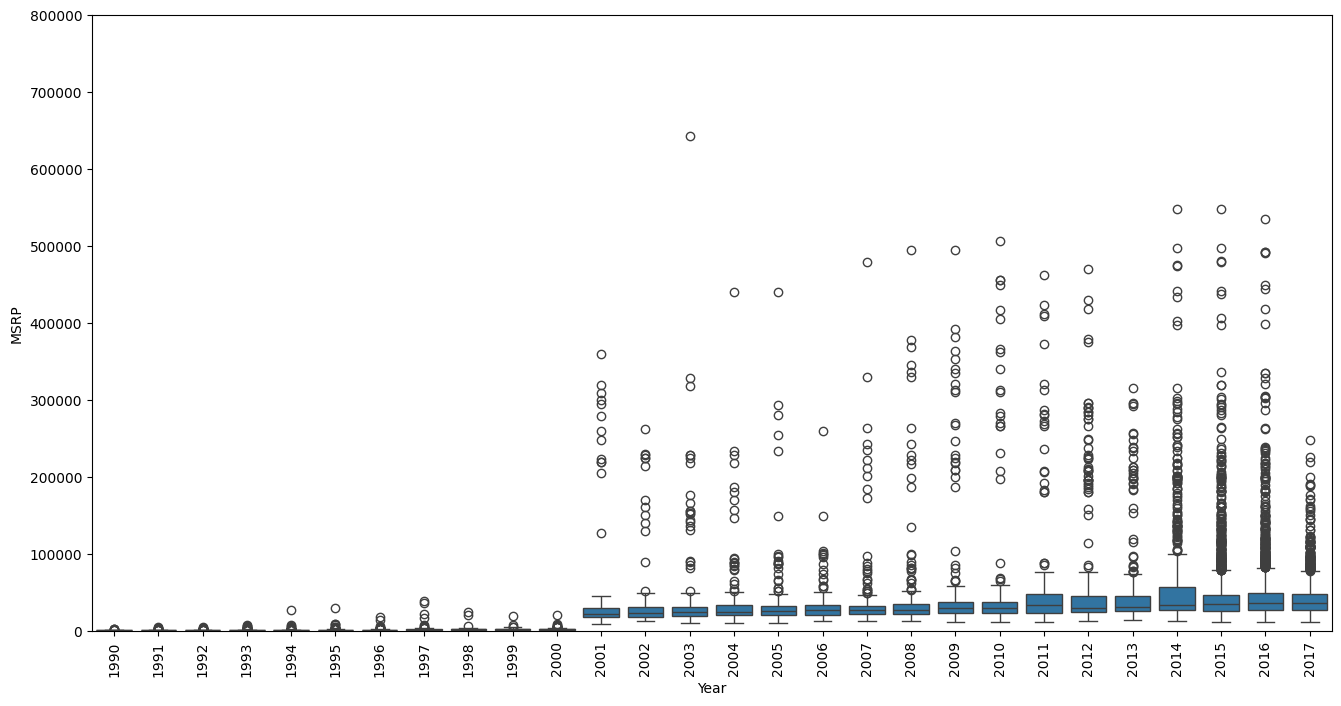

In [ ]:
var = 'Year'
data = pd.concat([df_train['MSRP'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="MSRP", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


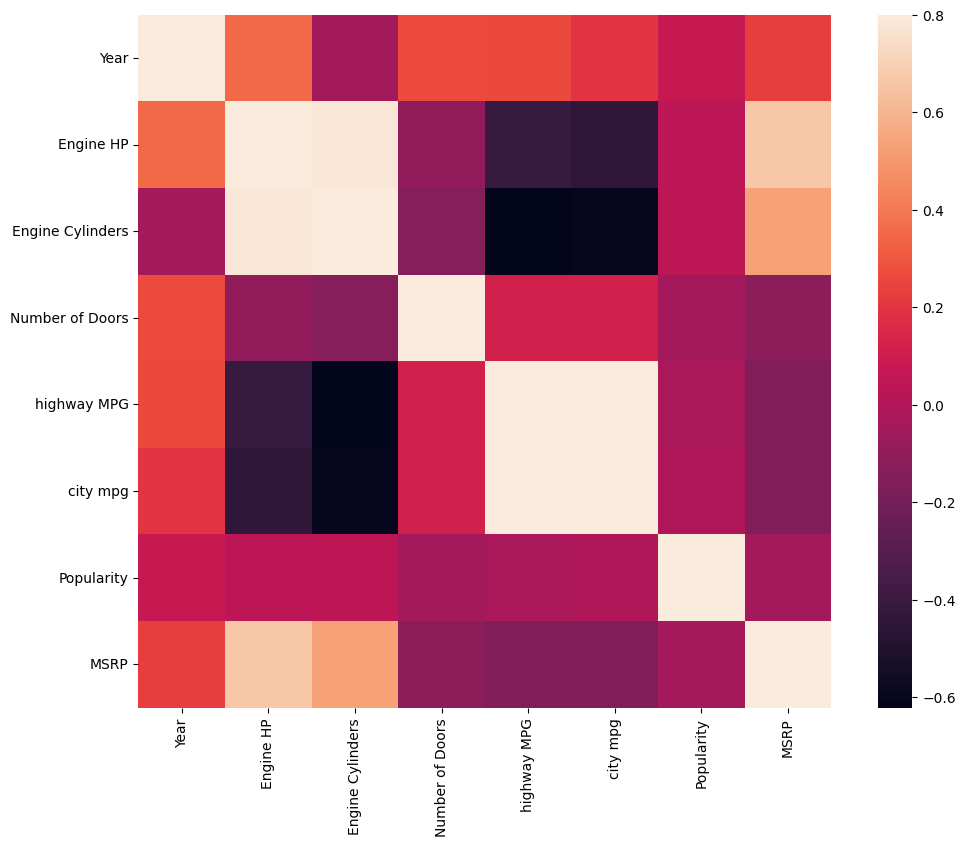

In [ ]:
#Dari tadi kita ngecek faktor2 yang mempengaruhi harga rumah satu-satu
#Ada tools yang bernama 'correlation matrix' yang menghitung hubungan antara 2 variable
#Makin besar nilai correlation matrix, makin kuat hubungan antara 2 variable

#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

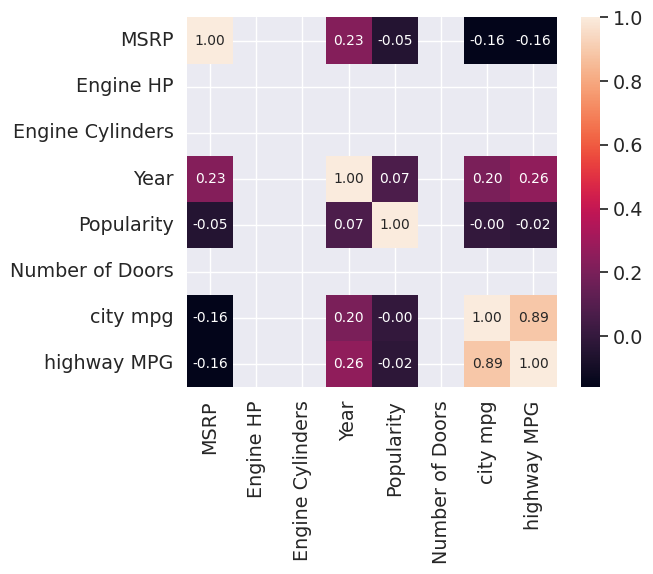

In [ ]:
#Lihat warna agak pusing, kita ingin melihat angka. untuk 1o variabel dengan correlation matrix terkuat
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'MSRP')['MSRP'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

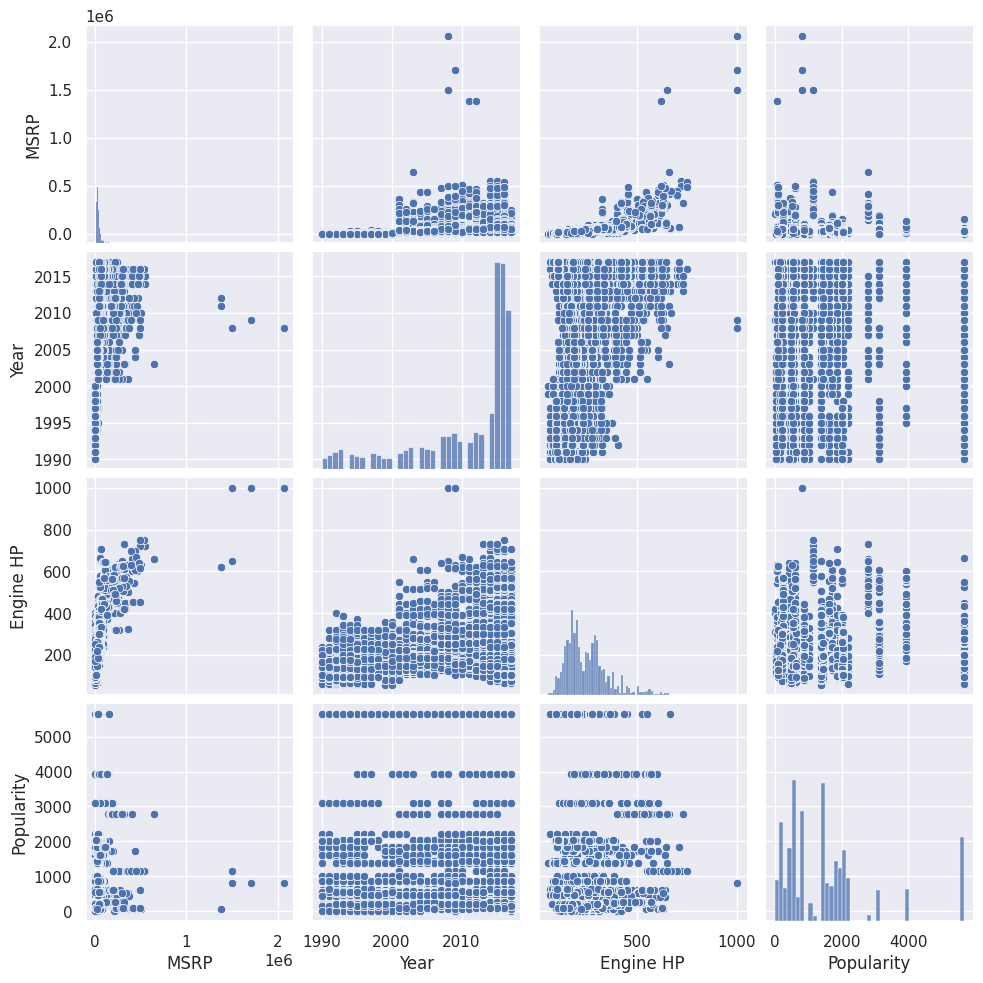

In [ ]:
#scatterplot yang lengkap
sns.set()
cols = ['MSRP', 'Year', 'Vehicle Size', 'Engine HP', 'Popularity']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

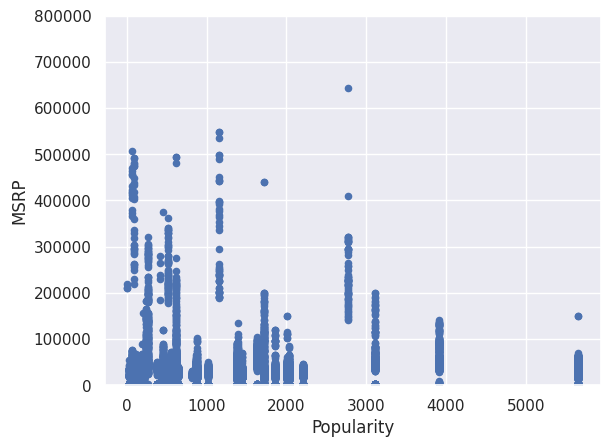

In [ ]:
var = 'Popularity'
data = pd.concat([df_train['MSRP'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='MSRP', ylim=(0,800000));